## <font color=purple> Regression-Rakam Tahminleme
    

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
pip install xlrd


  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [16]:
 df=pd.read_excel("cars.xls")

In [17]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [18]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [20]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [21]:
df.corr()

C:\Users\busel\AppData\Local\Temp\ipykernel_93728\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [22]:
df.shape

(804, 12)

In [24]:
df["Make"].unique()
#hangi araba markaları var onu görüyoruz

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [25]:
df["Make"].nunique()
#kaç araba markası olduğunu görürürüz

6

In [26]:
df["Make"].value_counts()
#hangi marka arabadan kaç tane var

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [29]:
df["Make"].value_counts(normalize=True)
#hangi arabadan kaç tane var yüzdelik hesabıyla gösterir

Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: Make, dtype: float64

In [34]:
df["Make"].value_counts(normalize=True)*100

Chevrolet    39.800995
Pontiac      18.656716
SAAB         14.179104
Buick         9.950249
Cadillac      9.950249
Saturn        7.462687
Name: Make, dtype: float64

In [31]:
import seaborn as sns
#grafiklerle göstermeye yarıyor


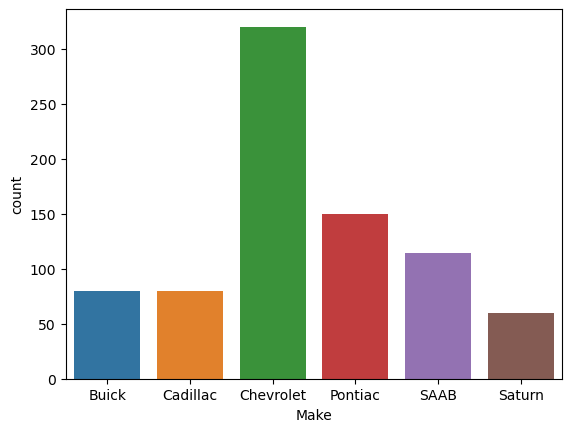

In [33]:
sns.countplot(x=df["Make"]);

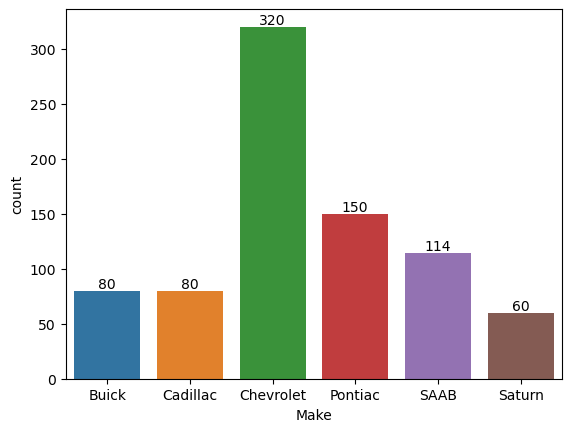

In [35]:
ax=sns.countplot(x=df["Make"])
ax.bar_label(ax.containers[0]);

C:\Users\busel\AppData\Local\Temp\ipykernel_93728\976354161.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


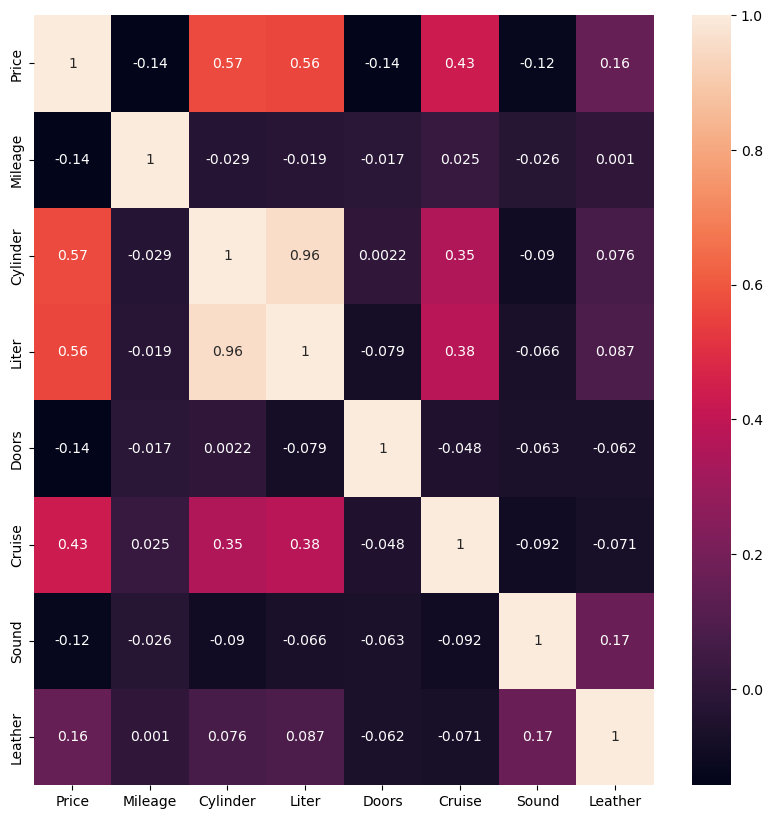

In [42]:
plt.figure(figsize=(10,10)) #grafiğin boyutunu 10a 10 yaptık
sns.heatmap(df.corr(),annot=True);


In [46]:
abs(df.corr()["Price"].sort_values(ascending=False)) 
#abs mutlak değer. Sort value ile verileri sıralarız ascending küçükten büyüğe sıralar false olduğu için büyükten küçüğe sıralar

C:\Users\busel\AppData\Local\Temp\ipykernel_93728\3594752576.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()["Price"].sort_values(ascending=False))


Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [47]:
df["Doors"].value_counts()

4    614
2    190
Name: Doors, dtype: int64

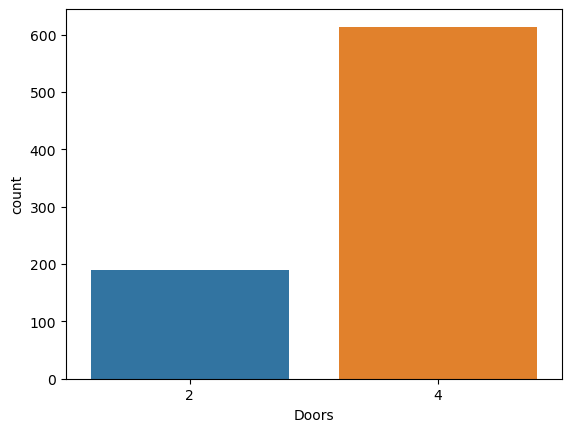

In [49]:
sns.countplot(x=df["Doors"]);

In [50]:
df.isnull().sum()
#Boş değeri kontrol eder.

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

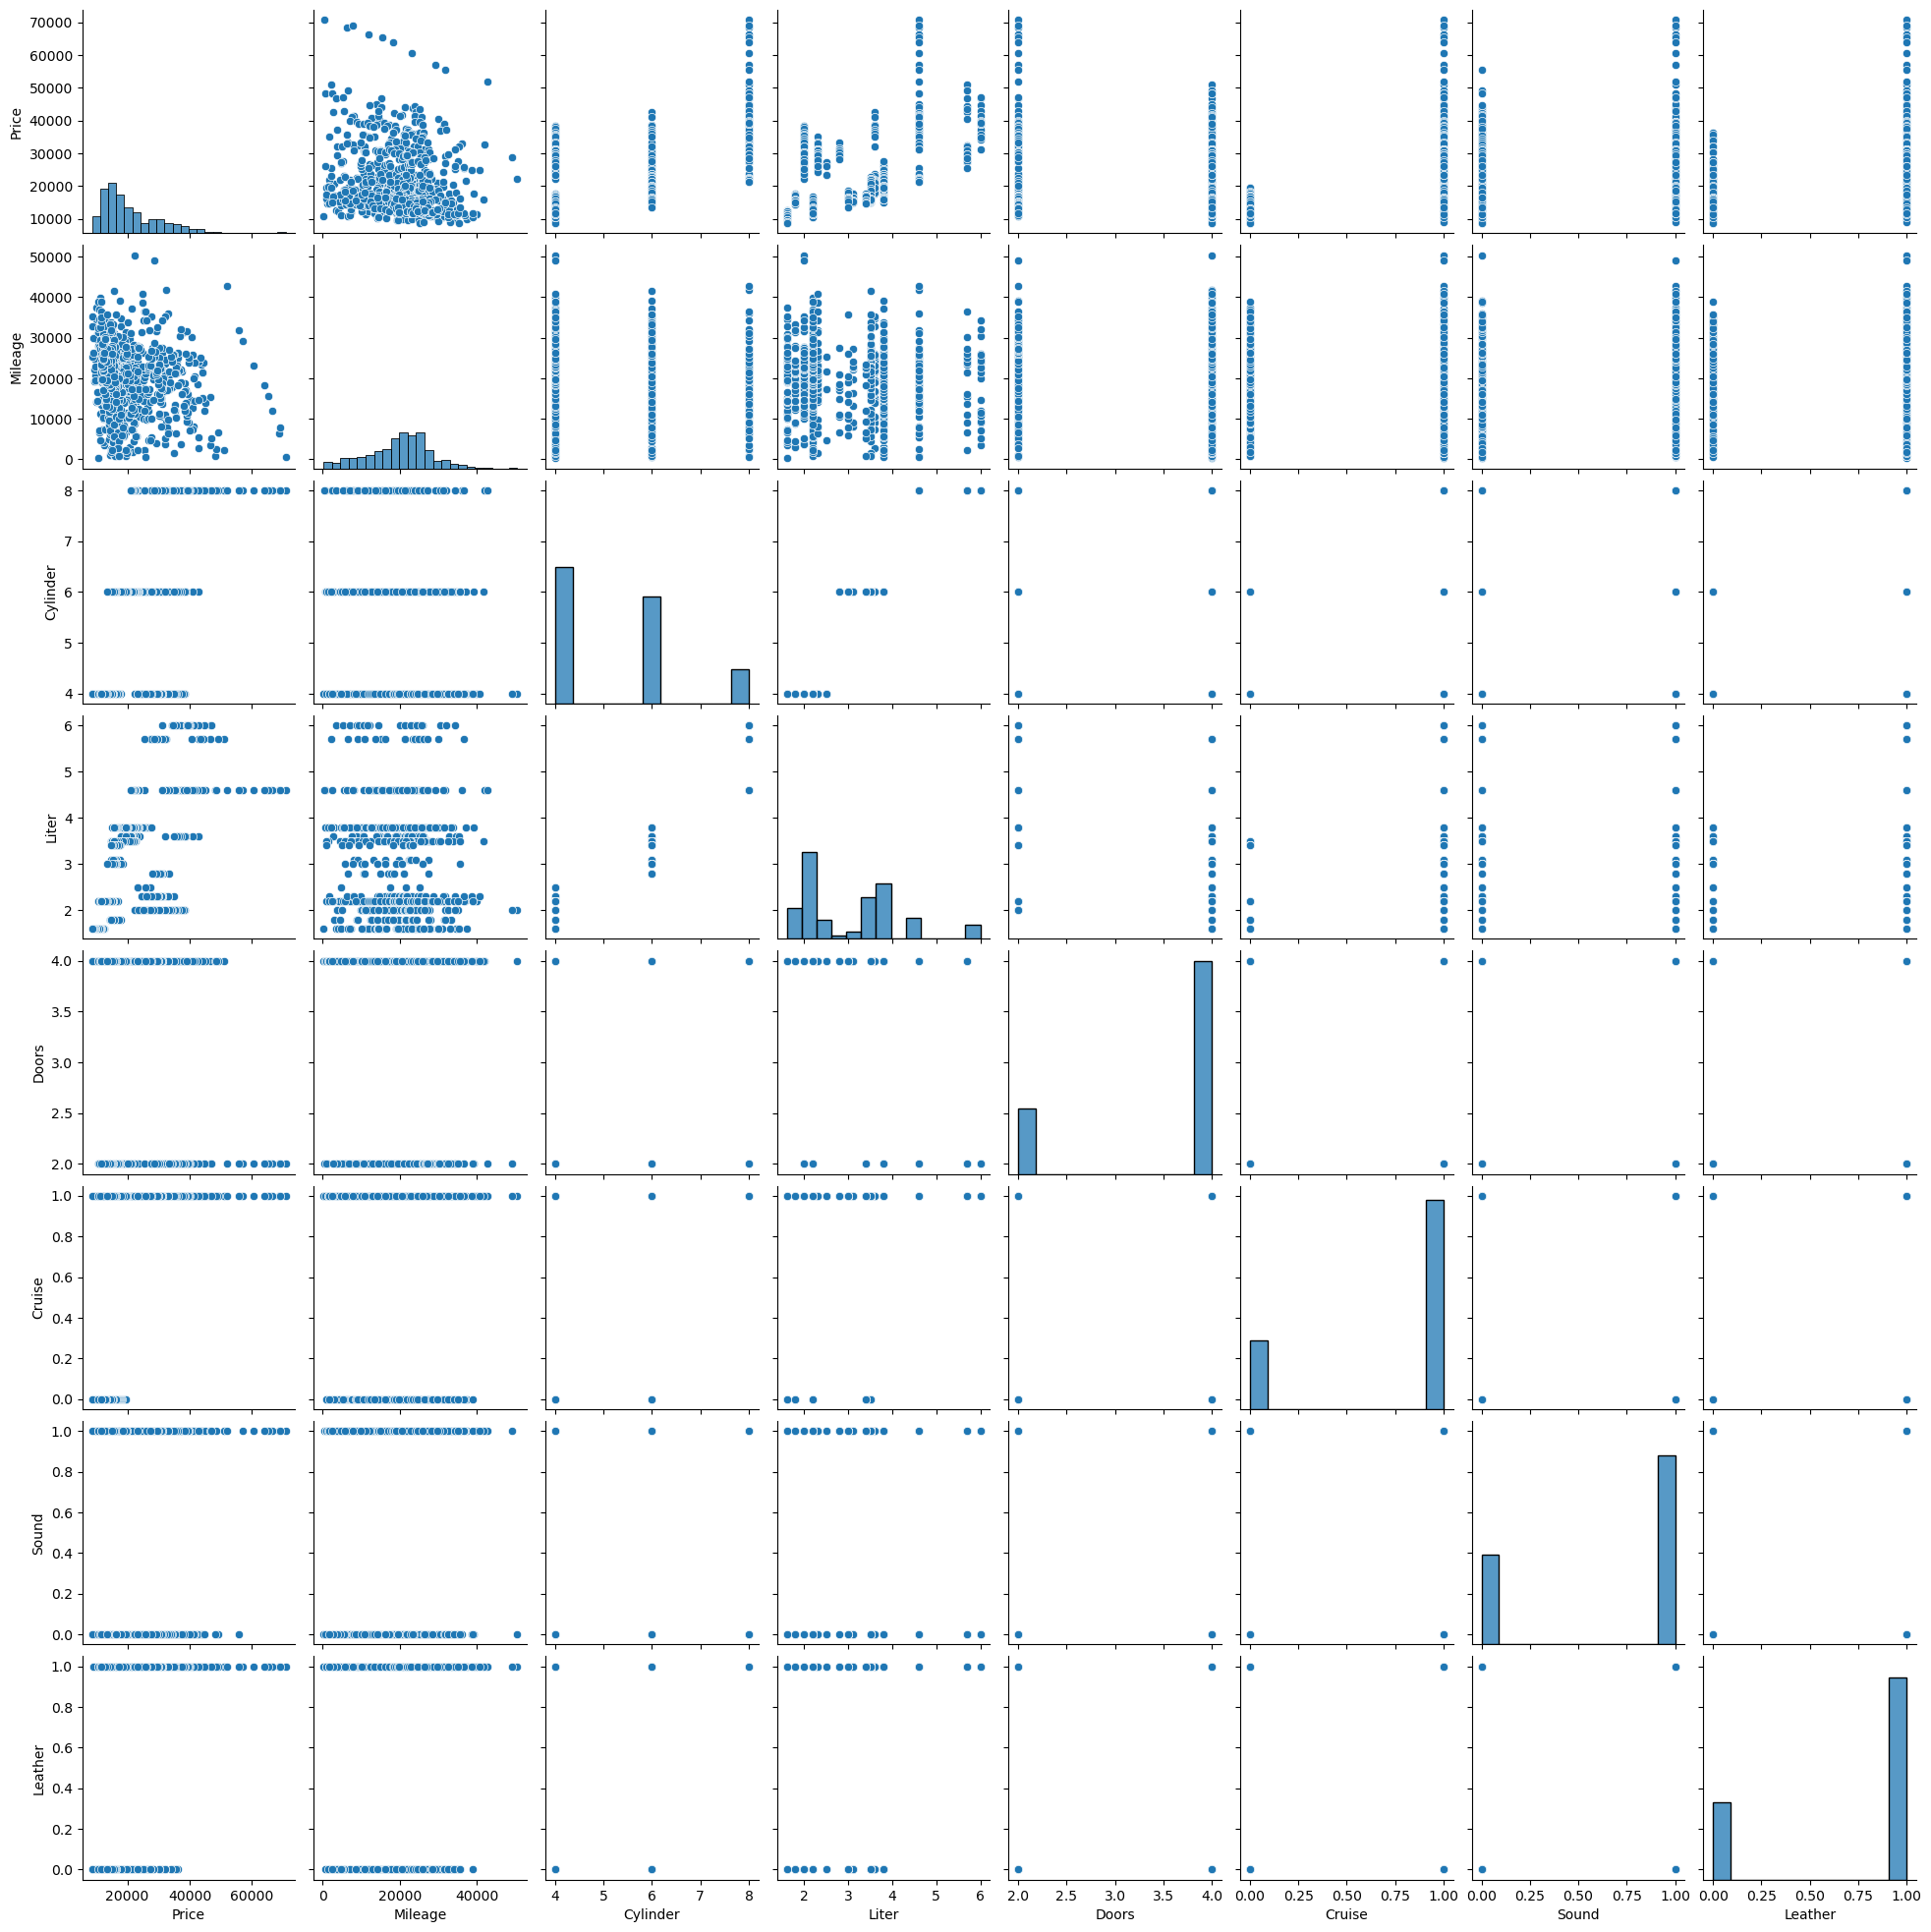

In [52]:
sns.pairplot(df);
#bütün grafiklerin df sütununa göre nasıl değiştiğini gözlemliyoruz

## Modelling


In [53]:
x=df[["Mileage","Cylinder","Liter","Cruise"]]
y=df["Price"]; 

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
# yüzde 80ini kullanıyorum geri kalan yüzde 20si ile tahmin ediyorum

In [58]:
x_train.shape,x_test.shape

((643, 4), (161, 4))

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr=LinearRegression()

In [61]:
model=lr.fit(x_train,y_train)

In [62]:
tahmin=model.predict(x_test)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error

In [64]:
(mean_squared_error(tahmin,y_test))**0.5

7413.255792158802

In [65]:
r2_score(tahmin,y_test)

-0.3671260571211754

In [66]:
x=df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]]
y=df["Price"];

In [67]:
x

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D
...,...,...,...,...,...,...
799,16229,6,3.0,1,Saturn,L300 Sedan 4D
800,19095,6,3.0,1,Saturn,L300 Sedan 4D
801,20484,6,3.0,1,Saturn,L300 Sedan 4D
802,25979,6,3.0,1,Saturn,L300 Sedan 4D


In [68]:
x=pd.get_dummies(x,drop_first=True)
#stingi integere çevirir

In [69]:
x

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
800,19095,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
801,20484,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
802,25979,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#saat bazlı random ilerlediğinde hata alırız random state e bir değer atayıp onun üzerinden gdersek daha doğru sonuçlar alırız

In [71]:
model=lr.fit(x_train,y_train)
#modeli eğitmek için fit kullanılır

In [72]:
tahmin=model.predict(x_test)
#eğitilen model ile kenara saklanan verileri tahmin ederiz

In [73]:
(mean_squared_error(tahmin,y_test))**0.5
#ne kadar hata yaptığımızı gösterir

1523.6314728711307

In [75]:
r2_score(tahmin,y_test)
#başarı oranımız %97 oldu

0.9717252793475158

In [76]:
from sklearn.linear_model import Ridge, Lasso

In [77]:
R=Ridge()  #hatanın karesini alır
L=Lasso()  #hataların mutlak değerini alır

In [78]:
R.fit(x_train,y_train)

Ridge()

In [79]:
tahmin2=R.predict(x_test)

In [81]:
(mean_squared_error(tahmin2,y_test))**0.5

1575.6786242840142

In [82]:
r2_score(tahmin2,y_test)

0.9684687553754918

In [83]:
L.fit(x_train,y_train)

Lasso()

In [84]:
tahmin3=L.predict(x_test)

In [86]:
(mean_squared_error(tahmin3,y_test))**0.5

1527.0430928302264

In [87]:
r2_score(tahmin3,y_test)

0.9712425418609402

In [88]:
from sklearn.linear_model import ElasticNet

In [95]:
E=ElasticNet(l1_ratio=0.8)
#ridge ve lassoyu ayrı ayrı çalıştırmak yerine birlikte çalıştırır

In [96]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [97]:
tahmin4=E.predict(x_test)

In [98]:
r2_score(tahmin4,y_test)

0.39718993519691126